# **Install Library**

# **Import Library**

In [1]:
import pandas as pd
import numpy as np
import graphviz
import math
import seaborn as sns
import matplotlib.pyplot as plt
import pydotplus


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from io import StringIO
from ipywidgets import Image

# **Read Dataset**

In [2]:
import pandas as pd

# URL for dataset
dataset = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Indonesia/QueryCountryIndonesia(1910-2016)USGS.csv"

# Load dataset
df = pd.read_csv(dataset)

# Konversi kolom 'time' ke format datetime
df['time'] = pd.to_datetime(df['time'])

# Ambil bagian tanggal (YYYY-MM-DD)
df['time'] = df['time'].dt.strftime('%Y%m%d')

# Pilih kolom yang akan digunakan
df_selected = df[['time', 'latitude', 'longitude', 'depth', 'mag']]

df_selected.head()


,time,latitude,longitude,depth,mag
0,20161231,1.0439,126.5326,42.38,4.0
1,20161231,-6.0786,130.0318,137.85,4.6
2,20161230,-9.1767,123.5689,116.02,4.6
3,20161230,1.7358,126.5028,42.15,5.0
4,20161230,-9.1597,118.7325,105.58,4.4


# **Create Function**

In [3]:
# function for creating a feature importance dataframe
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)

**Data Set Characteristics:**

    :Number of Instances: 606K
    :Number of Attributes: 22 numeric, predictive attributes and the target
    :Attribute Information:
        - time: date and time of the earthquake
        - latitude: decimal degrees latitude
        - longitude: decimal degrees longitude
        - depth: earthquake depth in kilometers
        - mag: earthquake magnitude
        - magType: earthquake magnitude type
        - nst: number of seismic stations
        - gap: horizontal distance (degrees) to nearest station
        - dmin: horizontal distance (kilometers) to nearest station
        - rms: root mean square
        - net: seismic network
        - id: event id
        - updated: date and time when the event was most recently updated
        - place: location of the earthquake
        - type: type of the earthquake
        - horizontalError: horizontal error in kilometers
        - depthError: depth error in kilometers
        - magError: magnitude error
        - magNst: number of stations reporting the magnitude
        - status: event status
        - locationSource: location provider
        - magSource: magnitude provider

    :Missing Attribute Values: None

    :Creator: USGS

This dataset contains information about earthquakes that occurred in California from 1968 to 2018. It includes various attributes such as the date


In [4]:
df_selected = df_selected

In [5]:
# Menyiapkan target 'y' (variabel dependen)
y = df_selected['mag']

# Menyiapkan fitur-fitur 'X' (variabel independen)
X = df_selected.drop(columns=['mag'])

# Membagi data menjadi data latih dan data validasi
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

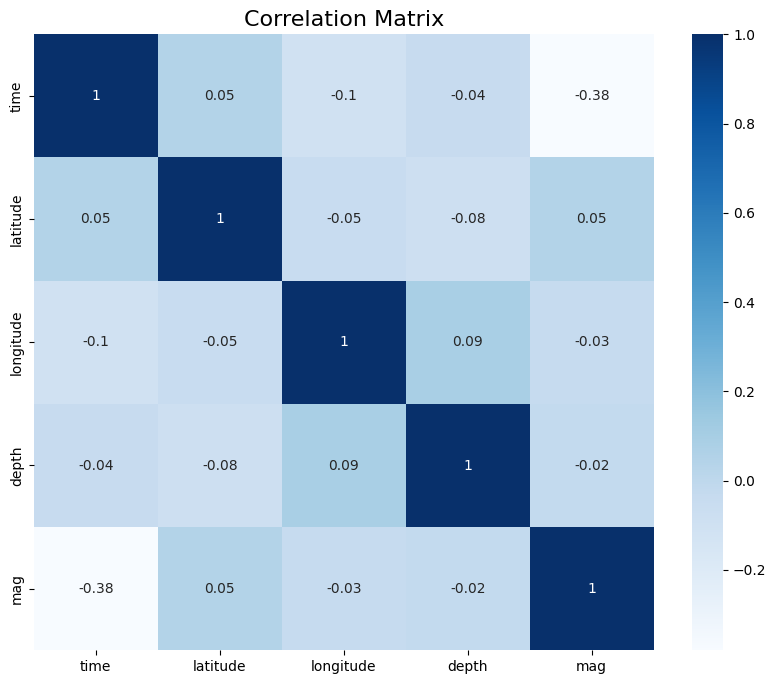

In [6]:
# Membuat matriks korelasi
corr_matrix = df_selected.corr().round(2)

# Membuat heatmap dari matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='Blues', annot=True)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

# **Random Forest**

In [7]:
rf = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, oob_score=True, random_state=42)

In [8]:
print(f"""R^2 Training Score: {rf.score(X_train, y_train):.2f}
OOB Score: {rf.oob_score_:.2f}
R^2 Validation Score: {rf.score(X_valid, y_valid):.2f}""")

R^2 Training Score: 0.90
OOB Score: 0.30
R^2 Validation Score: 0.30


# **Decision Tree**

<ipython-input-9-b7305f0e6bc8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.dropna(inplace=True)
<ipython-input-9-b7305f0e6bc8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.dropna(inplace=True)
<ipython-input-9-b7305f0e6bc8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['mag_category'] = pd.cut(df_selected['mag'], bins=[0, 2, 5, np.i

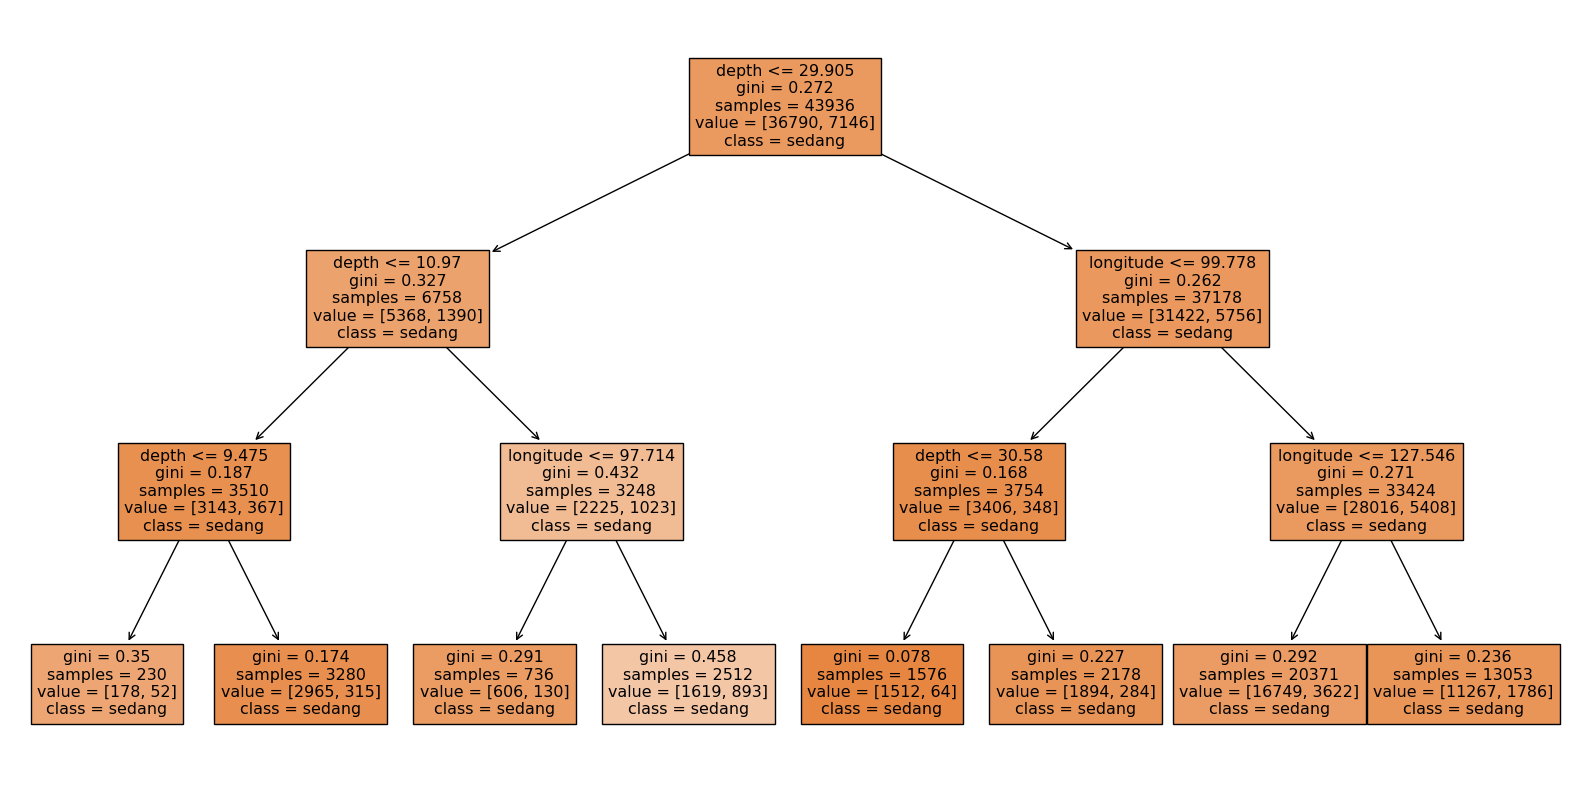

In [9]:
# Menghapus baris yang mengandung NaN
df_selected.dropna(inplace=True)
# Drop rows with NaN values
df_selected.dropna(inplace=True)


# Membuat kategori berdasarkan rentang nilai 'mag'
df_selected['mag_category'] = pd.cut(df_selected['mag'], bins=[0, 2, 5, np.inf], labels=['rendah', 'sedang', 'tinggi'])

# prepare the data
X = df_selected[['latitude', 'longitude', 'depth']]  # Fitur-fitur yang digunakan
y = df_selected['mag_category']  # Variabel target kategorikal
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit the classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True)
plt.show()


# **Information Gain**

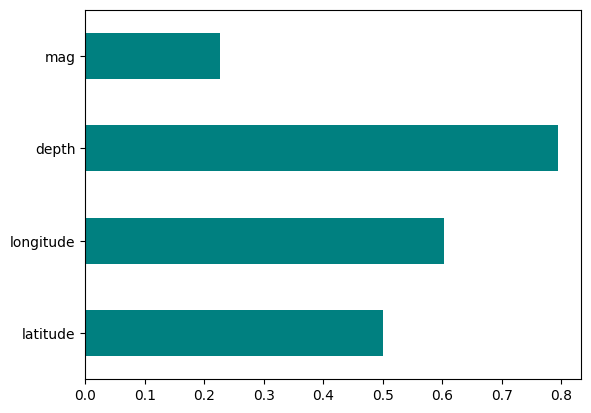

In [11]:
from sklearn.feature_selection import mutual_info_classif

# Pilih kolom yang akan digunakan
df = df_selected[['time', 'latitude', 'longitude', 'depth', 'mag']]

# Bagi data menjadi fitur (X) dan target (Y)
X = df[['latitude', 'longitude', 'depth', 'mag']]
Y = df['time']

# Menghitung importance menggunakan mutual_info_classif
importances = mutual_info_classif(X, Y)

# Membuat Series dari nilai importance untuk setiap fitur
feat_importances = pd.Series(importances, index=X.columns)

# Membuat plot
feat_importances.plot(kind='barh', color='teal')
plt.show()


# **Chi-square Test**


In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

# Pilih kolom yang akan digunakan
df = df_selected[['latitude', 'longitude', 'depth', 'mag']]

# Menggunakan MinMaxScaler untuk memastikan nilai non-negatif
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df)

# Inisialisasi SelectKBest dengan metode chi-square
chi2_features = SelectKBest(chi2, k=3)

# Melakukan seleksi fitur menggunakan chi-square
X_kbest_features = chi2_features.fit_transform(X_scaled, df_selected['time'])

# Cetak jumlah fitur sebelum dan setelah seleksi
print("Jumlah fitur sebelum seleksi:", X_scaled.shape[1])
print("Jumlah fitur setelah seleksi:", X_kbest_features.shape[1])

print(X_scaled)
print(X_kbest_features)

Jumlah fitur sebelum seleksi: 4
Jumlah fitur setelah seleksi: 3
[[0.70846471 0.68550621 0.06375963 0.203125  ]
 [0.28949412 0.76157743 0.21086287 0.296875  ]
 [0.10725294 0.62107655 0.1772265  0.296875  ]
 ...
 [0.53947059 0.91182417 0.02157165 0.84375   ]
 [0.962      0.67655819 0.02157165 0.796875  ]
 [0.92264706 0.67503641 0.02157165 0.765625  ]]
[[0.70846471 0.68550621 0.06375963]
 [0.28949412 0.76157743 0.21086287]
 [0.10725294 0.62107655 0.1772265 ]
 ...
 [0.53947059 0.91182417 0.02157165]
 [0.962      0.67655819 0.02157165]
 [0.92264706 0.67503641 0.02157165]]


# **Ridge**

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

# Pilih kolom yang akan digunakan
df = df_selected[['latitude', 'longitude', 'depth', 'mag']]

# Bagi data menjadi fitur (X) dan target (Y)
X = df[['latitude', 'longitude', 'depth', 'mag']]
Y = df_selected['time']

# Bagi data menjadi data latih dan data validasi
X_train, X_val, y_train, y_val = train_test_split(X, Y, random_state=0)

# Inisialisasi model Ridge
model = Ridge(alpha=1e-2).fit(X_train, y_train)

# Mengambil nilai koefisien (importances)
importances = model.coef_

# Cetak fitur dan nilai koefisien
for i in range(len(importances)):
    print(f"{X.columns[i]:<8} {abs(importances[i]):.3f}")


latitude 1677.098
longitude 971.874
depth    40.754
mag      87933.931


# **Linear Regression**

Feature: Latitude, Score: 1620.43614
Feature: Longitude, Score: -986.52925
Feature: Depth, Score: -38.60792
Feature: Magnitude, Score: -88358.05698


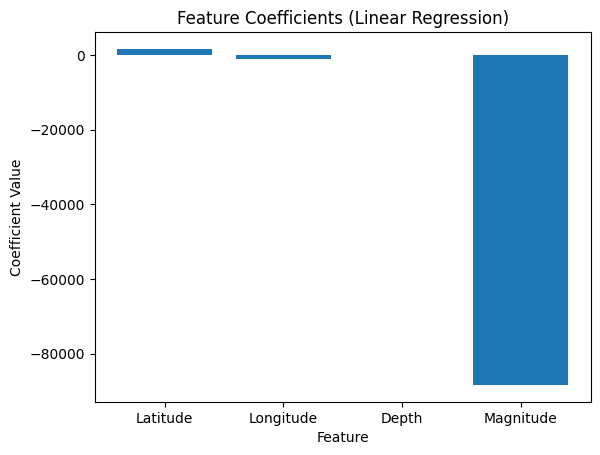

In [14]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# URL for dataset
dataset = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Indonesia/QueryCountryIndonesia(1910-2016)USGS.csv"

# Load dataset
df = pd.read_csv(dataset)

# Mengambil bagian tanggal dari kolom 'time' dan memformatnya
df['time'] = pd.to_datetime(df['time']).dt.strftime('%Y%m%d')

# Pilih kolom yang akan digunakan
df_selected = df[['latitude', 'longitude', 'depth', 'mag']]

# Bagi data menjadi fitur (X) dan target (Y)
X = df_selected[['latitude', 'longitude', 'depth', 'mag']]
Y = df['time']

# Inisialisasi model Linear Regression
model = LinearRegression()

# Melatih model
model.fit(X, Y)

# Mengambil nilai koefisien (importances)
importance = model.coef_

# Cetak fitur dan nilai koefisien
feature_names = ['Latitude', 'Longitude', 'Depth', 'Magnitude']
for i, v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (feature_names[i], v))

# Plot feature importance
plt.bar(feature_names, importance)
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.title('Feature Coefficients (Linear Regression)')
plt.show()


# **CART Regression**

Feature: Latitude, Score: 0.19402
Feature: Longitude, Score: 0.21442
Feature: Depth, Score: 0.36524
Feature: Magnitude, Score: 0.22632


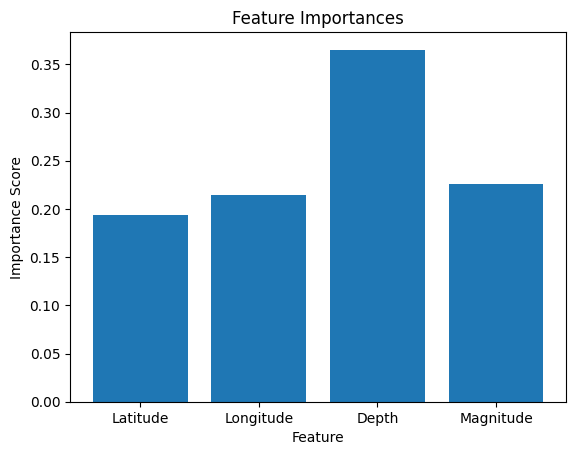

In [15]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import matplotlib.pyplot as plt

# URL for dataset
dataset = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Indonesia/QueryCountryIndonesia(1910-2016)USGS.csv"

# Load dataset
df = pd.read_csv(dataset)

# Mengambil bagian tanggal dari kolom 'time' dan memformatnya
df['time'] = pd.to_datetime(df['time']).dt.strftime('%Y%m%d')

# Pilih kolom yang akan digunakan
df_selected = df[['latitude', 'longitude', 'depth', 'mag']]

# Bagi data menjadi fitur (X) dan target (Y)
X = df_selected[['latitude', 'longitude', 'depth', 'mag']]
Y = df['time']

# Inisialisasi model Decision Tree Regressor
model = DecisionTreeRegressor()

# Melatih model
model.fit(X, Y)

# Mendapatkan nilai penting fitur
importance = model.feature_importances_

# Meringkas pentingnya fitur
feature_names = ['Latitude', 'Longitude', 'Depth', 'Magnitude']
for i, v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (feature_names[i], v))

# Plot pentingnya fitur
plt.bar(feature_names, importance)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importances')
plt.show()


# **XGBoost Regression**

Feature: latitude, Score: 0.07194
Feature: longitude, Score: 0.08356
Feature: depth, Score: 0.42310
Feature: mag, Score: 0.42140


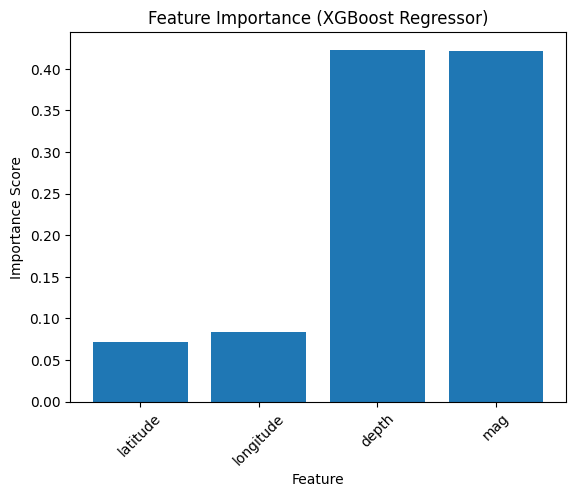

In [16]:
import pandas as pd
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# URL for dataset
dataset = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Indonesia/QueryCountryIndonesia(1910-2016)USGS.csv"

# Load dataset
df = pd.read_csv(dataset)

# Mengambil bagian tanggal dari kolom 'time' dan memformatnya
df['time'] = pd.to_datetime(df['time']).dt.strftime('%Y%m%d')

# Pilih kolom yang akan digunakan
df_selected = df[['latitude', 'longitude', 'depth', 'mag']]

# Bagi data menjadi fitur (X) dan target (Y)
X, Y = df_selected[['latitude', 'longitude', 'depth', 'mag']], df['time']

# Inisialisasi model XGBoost Regressor
model = XGBRegressor()

# Melatih model
model.fit(X, Y)

# Mengambil nilai importance
importance = model.feature_importances_

# Cetak fitur dan nilai importance
for i, v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (df_selected.columns[i], v))

# Plot feature importance
plt.bar(df_selected.columns, importance)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance (XGBoost Regressor)')
plt.xticks(rotation=45)
plt.show()


# **MLPClassifier**

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# URL for dataset
dataset = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Indonesia/QueryCountryIndonesia(1910-2016)USGS.csv"

# Load dataset
df = pd.read_csv(dataset)

# Mengambil bagian tanggal dari kolom 'time' dan memformatnya
df['time'] = pd.to_datetime(df['time']).dt.strftime('%Y%m%d')

# Pilih kolom yang akan digunakan
df_selected = df[['time', 'latitude', 'longitude', 'depth', 'mag']]

# Split features and target variable
X = df_selected.drop(columns=['time'])
y = df_selected['time']

# Create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a classifier
clf = MLPClassifier(hidden_layer_sizes=(2, 1), learning_rate_init=0.01)

# Fit the classifier using the training set
clf.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = clf.predict(X_test_scaled)

# Evaluate the classifier using the test set
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Function to calculate feature importance using permutation importance
def get_feature_importance(j, n):
    s = accuracy_score(y_test, y_pred)  # baseline score
    total = 0.0
    for i in range(n):
        perm = np.random.permutation(range(X_test_scaled.shape[0]))
        X_test_perm = X_test_scaled.copy()
        X_test_perm[:, j] = X_test_scaled[perm, j]
        y_pred_perm = clf.predict(X_test_perm)
        s_ij = accuracy_score(y_test, y_pred_perm)
        total += s_ij
    return s - total / n

# Feature importances
f = []
for j in range(X_test_scaled.shape[1]):
    f_j = get_feature_importance(j, 100)
    f.append(f_j)

# Plot
plt.figure(figsize=(10, 5))
plt.bar(range(X_test_scaled.shape[1]), f, color="r", alpha=0.7)
plt.xticks(ticks=range(X_test_scaled.shape[1]), labels=X.columns)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature importances")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Accuracy: 0.002640203932993445


KeyboardInterrupt: 